In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib, sys, os
matplotlib.get_backend()
#%matplotlib --list
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
!pip install itsdangerous==2.2.0 --quiet
if 'google.colab' in sys.modules:
    print('Colab environment detected.')
if (os.environ.get('DISPLAY', '') == '') and (os.name != 'nt'):
    print('No display found. Using non-interactive Agg backend')
    mpl.use('Agg')

Colab environment detected.
No display found. Using non-interactive Agg backend


In [ ]:
%%capture
!pip install swifter perfplot numpy==1.26.4 pandas==2.0.3 --force-reinstall
import pandas as pd
import numpy as np
import swifter
import perfplot
import timeit

## Задача: защищать финансовые и банковские данные

Незаконное разглашение банковской тайны, повлекшее тяжкие последствия, влечёт уголовную ответственность согласно ч. 2, 3,4 ст. 183 УК РФ.

### Решение

In [ ]:
from itsdangerous import URLSafeSerializer
auth_s = URLSafeSerializer("секретный пароль"*4096,"auth")
clear_text = "это охраняемя законом информация"
cipher_text = auth_s.dumps({"name": clear_text})

print("создали строку на локальном комптьютере\n\t", clear_text, "\nотправили зашифрованную информацию через интернет\n\t",cipher_text)
# eyJuYW1lIjoi0Y3RgtC-INC-0YXRgNCw0L3Rj9C10LzRjyDQt9Cw0LrQvtC90L7QvCDQuNC90YTQvtGA0LzQsNGG0LjRjyJ9.yOVmejo2FEP3yhjQhvc78Lu7MvM

создали строку на локальном комптьютере
	 это охраняемя законом информация 
отправили зашифрованную информацию через интернет
	 eyJuYW1lIjoi0Y3RgtC-INC-0YXRgNCw0L3Rj9C10LzRjyDQt9Cw0LrQvtC90L7QvCDQuNC90YTQvtGA0LzQsNGG0LjRjyJ9.yOVmejo2FEP3yhjQhvc78Lu7MvM


In [ ]:
data = auth_s.loads(cipher_text)
clear_text = data["name"]
print("приняли зашифрованную информацию из интернета\n\t", cipher_text, "\nрасшифровали строку на локальном комптьютере\n\t", clear_text)
# это охраняемя законом информация

приняли зашифрованную информацию из интернета
	 eyJuYW1lIjoi0Y3RgtC-INC-0YXRgNCw0L3Rj9C10LzRjyDQt9Cw0LrQvtC90L7QvCDQuNC90YTQvtGA0LzQsNGG0LjRjyJ9.yOVmejo2FEP3yhjQhvc78Lu7MvM 
расшифровали строку на локальном комптьютере
	 это охраняемя законом информация


## Задача: проверка действительности сертификата SSL

### Пишем код в парадигме Codeware (a.k.a. Software 1.0)

In [ ]:
import json
raw_result = !curl https://ssl-checker.io/api/v1/check/cbr.ru
result = json.loads(raw_result[0])
result

{'version': '1.0',
 'app': 'ssl-checker-api',
 'host': 'cbr.ru',
 'response_time_sec': '0.16',
 'status': 'ok',
 'result': {'host': 'cbr.ru',
  'resolved_ip': '185.178.208.7',
  'issued_to': '*.cbr.ru',
  'issued_o': None,
  'issuer_c': 'BE',
  'issuer_o': 'GlobalSign nv-sa',
  'issuer_ou': None,
  'issuer_cn': 'GlobalSign GCC R3 DV TLS CA 2020',
  'cert_sn': '18431513735173987779867338403',
  'cert_sha1': 'CF:E7:C9:7B:B9:98:32:B3:6C:77:9F:7C:F9:26:9E:97:5C:9D:C7:67',
  'cert_alg': 'sha256WithRSAEncryption',
  'cert_ver': 2,
  'cert_sans': 'DNS:*.cbr.ru; DNS:cbr.ru',
  'cert_exp': False,
  'cert_valid': True,
  'valid_from': '2024-03-04',
  'valid_till': '2025-04-05',
  'validity_days': 396,
  'days_left': 136,
  'valid_days_to_expire': 136,
  'hsts_header_enabled': False}}

In [ ]:
print('host',result['result']['host'])
print('cert_valid',result['result']['cert_valid'])
print('valid_from',result['result']['valid_from'])
print('valid_till',result['result']['valid_till'])

host cbr.ru
cert_valid True
valid_from 2024-03-04
valid_till 2025-04-05


### Посмотрите на стиль кода

In [ ]:
import pandas as pd
df = pd.read_json(raw_result[0])

selected_columns = ['host', 'cert_valid', 'valid_from', 'valid_till']
print(df["result"][selected_columns])

host              cbr.ru
cert_valid          True
valid_from    2024-03-04
valid_till    2025-04-05
Name: result, dtype: object


### А если я хочу с поиском ?

In [ ]:
!pip install itables --quiet
from itables import show
show(df["result"])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.6 MB/s eta 0:00:00


## Задача: скачать таблицу с сайта [ЦБ РФ](https://cbr.ru/currency_base/dynamics/?UniDbQuery.Posted=True&UniDbQuery.so=1&UniDbQuery.mode=1&UniDbQuery.date_req1=&UniDbQuery.date_req2=&UniDbQuery.VAL_NM_RQ=R01010&UniDbQuery.From=12.11.2024&UniDbQuery.To=16.11.2024) и выведите на экран отфильтрованную строку с курсом на 16.11.2024


### Решение

In [ ]:
%%capture
!pip install pandas==2.0.3
import pandas as pd
import numpy as np
import time

In [ ]:
%%time
url = "https://www.cbr.ru/currency_base/dynamics/?UniDbQuery.Posted=True&UniDbQuery.so=1&UniDbQuery.mode=1&UniDbQuery.date_req1=&UniDbQuery.date_req2=&UniDbQuery.VAL_NM_RQ=R01010&UniDbQuery.From=12.11.2024&UniDbQuery.To=15.11.2024"
df = pd.read_html(url)[0]
print(df.loc[df[df.columns[0]] == "15.11.2024"])

            0  1       2
2  05.07.2024  1  591905
CPU times: user 39.8 ms, sys: 5.77 ms, total: 45.5 ms
Wall time: 587 ms


### Объяснение работы кода

In [ ]:
tables = pd.read_html(url) # все таблицы
df = tables[0] #таблица Австралийский доллар
# <table class="data">
#       <tbody><tr>
#         <td colspan="3" class="">
#           <h3>Австралийский доллар</h3>
#         </td>
#       </tr>
#       <tr>
#         <th><a class="pseudo" data-sort="0">Дата</a><font size="1"> ▼</font>
#         </th>
#         <th>Единиц</th>
#         <th>Курс</th>
#       </tr>
#       <tr>
#         <td class="">05.07.2024</td>
#         <td class="">1</td>
#         <td class="">59,1905</td>
#       </tr>
#       <tr>
#         <td>04.07.2024</td>
#         <td>1</td>
#         <td>58,6894</td>
#       </tr>
#       <tr>
#         <td class="hover">03.07.2024</td>
#         <td class="hover">1</td>
#         <td class="hover">58,4795</td>
#       </tr>
#       <tr>
#         <td class="">02.07.2024</td>
#         <td class="">1</td>
#         <td class="">58,2098</td>
#       </tr>
#     </tbody></table>
print(df)

                      0                     1                     2
0  Австралийский доллар  Австралийский доллар  Австралийский доллар
1                Дата ▼                Единиц                  Курс
2            05.07.2024                     1                591905
3            04.07.2024                     1                586894
4            03.07.2024                     1                584795
5            02.07.2024                     1                582098


In [ ]:
result = df.loc[df[0] == "05.07.2024"]
print(result)

            0  1       2
2  05.07.2024  1  591905


## Задача: подключить базу данных с помощью sqlalchemy



### Решение в парадигме Neuralware (a.k.a. Software 2.0)

In [ ]:
!pip install sqlacodegen gdown --quiet
!gdown --quiet https://github.com/lerocha/chinook-database/releases/download/v1.4.5/Chinook_Sqlite.sqlite -O database.db
!sqlacodegen sqlite:///database.db

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.53 which is incompatible.
# coding: utf-8
from sqlalchemy import Column, DateTime, ForeignKey, Integer, NVARCHAR, Numeric, Table
from sqlalchemy.orm import relationship
from sqlalchemy.ext.declarative import declarative_base

Base = declarative_base()
metadata = Base.metadata


class Artist(Base):
    __tablename__ = 'Artist'

    ArtistId = Column(Integer, primary_key=True)
    Name = Column(NVARCHAR(120))


class Employee(Base):
    __tablename__ = 'Employee'

    EmployeeId = Column(Integer, primary_key=True)
    LastName = Column(NVARCHAR(20), nullable=False)
    FirstName = Column(NVARCHAR(20), nullable=False)
    Title = Column(NVARCHAR(30))
    ReportsTo = Colu

Напоследок посмотрим, как делать автоматический EDA с помощью библиотеки [summarytools](https://github.com/6chaoran/jupyter-summarytools) - хорошее обновляемое решение


In [ ]:
%%capture
! pip install summarytools

In [ ]:
from summarytools import dfSummary
import pandas as pd
iris_df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
dfSummary(iris_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,sepal.length[float64],Mean (sd) : 5.8 (0.8)min < med < max:4.3 < 5.8 < 7.9IQR (CV) : 1.3 (7.1),35 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJ4AAAA6CAYAAABBCOCDAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACa0lEQVR4nO3cTa7aMBQF4OsmQPhRIsRTmLGBSh0wzCK62C7hIbECdsAMKUJBpC8ihHTQdlxxb9qD6/PNTTw4Mjd2fF3f9+Ij59x0tVp9TdN0qf2Ny+VyLsvyW9/3H0POjf4sRk/AYJym6bIoio8sy5pnB1dVlez3+2VZlmMRUQXPOTcVkbFm7C+3UEPvc/BERCTLsibP8+/K4VPtc4dacZ1zQa643gcPCL7i+ozBM0KtuL77hJ4AhYnBIwgGjyDMNR63FEjDFDxuKZCWdcXjlgKpDLKdwi0FehZfLgiCwSMIBo8gGDyCYPAIgsEjCH6dAtR13UhEUuec9ie8PfVh8EDquh61bftls9lEURQ9vfku4vepD4MHcrvd4iRJZtvttlmv1+dnx/t+6sPggc3n8yBPffhyQRBBr3jG4j59PB6jgacUjGCDZy3u27ZNuq773DTNu4ho/yqDFWzwrMX98XhcHg6H2f1+j/7G/P53wQbvN21xfz6fvS3sXwE8eIY6izWWx6DBs9RZrLH8Bg2epc5ijeU3+F+tiK7OYo3lN24gEwSDRxAMHkEweATB4BEEg0cQDB5BxMZuTzy2IpXY0u2Jx1akFVu6PfHYirRiEX23Jx5bkRZfLgiCwSOIl/g6hXSMl5VMXQisva8ZPE9ZLytZuhAM0fuawfOU5SPaqqqS3W6Xl2X55py7KB6fLhaLvCiKi7b3NYPnOc1HtENd7ZxMJu/aLggMXoBe4Wongxcw5NVObqcQBINHEAweQTB4BMHgEQSDRxAMHkHEIj+PMDSDr9drIiJS13VyOp1m/3I88tm+j0fPvaqq5AcmRZvN5RuuJwAAAABJRU5ErkJggg=="">",0(0.0%)
2,sepal.width[float64],Mean (sd) : 3.1 (0.4)min < med < max:2.0 < 3.0 < 4.4IQR (CV) : 0.5 (7.0),23 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJ4AAAA6CAYAAABBCOCDAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACfElEQVR4nO3dvY7aQBQF4Dtg0PAjW/wsdDQpV0phiYYHSJmHzSOkoEhNkWYrOiQLgXDWYjBOEdFG8R1vDtacr9rmslMcWTOX8cVUVSUhMsYMZrPZ1ziOJ9rPOJ/PxyzLvlVV9d7k2kIQoRcA1I/jeLLZbN6TJCnqFp9OJ7vdbidZlvVFhMGrKeTgiYhIkiTFYrH4pSwfNLqYgHTQC6AwMXgEweARBINHEAweQQR/qvVRlmVPRGJjjPYjrqH2ABk8pTzPe865z6vVqtvtdmv3AUX+NKCNMUE2oBk8pev1Gllrh2maFsvl8li3PvQGNIPnaTQasQGtwMMFQTB4BMHgEQSDRxAMHkEweATB4BFEq/t4xpiBiPSV5fH9fu81uR76d60Nnu87E845W5bla1EU30VE2wAmpdYGTzzfmdjv95Pdbje83W7dj1gc/V2bgyci+ncmjsdjsF9XPQN48Dz2adyjtRg0eD77NO7R2g39xFPv07hHazd08EREt0/jHq3d2EAmCAaPIBg8gmDwCILBIwgGjyAYPIJg8AiCwSMIBo8gGDyCYPAIgsEjiKe4nUI6ni87QWfzMXhAnoMd7XQ6/ZIkyUhTjJ7Nx+CB+A52dM5ZEXldr9c/5vP5uU7tM8zmY/BAfAc7Pm5gW2udcj4f9CItgwemHezY9hvYPNUShPcTj2MkSMMreBwjQVq+TzyOkSCVRg4XHCNBdfFwQRARDweEEPFwQAgRDweEEInwcBCiBn55siMid20xvzILkO8FhbIse3mefxqPx2+dTsdp1sDgBaihCwovaZr+1P5yZfT4o26xiMjlcrEiInme28PhMPyf9cj/3fb6Ry3Sb0rOY0PipYrvAAAAAElFTkSuQmCC"">",0(0.0%)
3,petal.length[float64],Mean (sd) : 3.8 (1.8)min < med < max:1.0 < 4.3 < 6.9IQR (CV) : 3.5 (2.1),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJ4AAAA6CAYAAABBCOCDAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACR0lEQVR4nO3cQa6iQBSF4VMtGtQEYkh05gY6eQOHLqKnvc9eQg9cgTtwZkIIRvoREXyD3kBTRed4U+ebQ2rwxxSXElcUxc8syzbwdLvdqrIsf71er0/fe0h8kizLNsfj8TPP83bsxXVdp6fTaVOW5QKAwpN/lgBAnuftdrv943mP5YTrkUh8Yy9A4qTwhELhCYXCEwqFJxQKTygUnlAoPKFQeEKRsBcQM+fcEsAi4BYPq+/IFR6Jc25ZFMWP0AMazjmTBzQUHs8i5gMaCo8s1gMaCi9A4B4tG4ZhPuV6LFF4nkL3aF3XpX3ff2/b9jcA3188sxSev6A92uVy2ZzP59Xz+Zz9j8W9O4UXyHePVlWV2f3ZFDRAFgqFJxQKTygUnlAoPKFQeEKh8IRC4QmFwhMKvbkwrO/7OYDMOedzOfUQqcIzqmmaedd1H/v9fjabzUa/K2YfIlV4Rj0ejyRN09XhcGh3u1015tp3OESq8Ixbr9e+B0mphxT0cCEUCk8oFJ5QKDyhCH64CJwlAYb/lCz+gsILnSUB/HmScASFFzJLAt5jniQck8zxAmZJgOE/JVvG3iJpgByhd9giKbwIvcMWSeFFjLlFijo8ffuEJ9rw9O0TrmjDg759QhVzeAD07RMWvasViuh/8cRP6ABa4cloUwygFZ6MNsUA2nR4msNxhQygzYanOZxtZsOD5nCmWQ4PgOZwVmmOJxQJ8Pcpw+fi+/2eAkDTNOn1el2Nvb6u67Tv+wR+86BsGIaEtXbL17PXXtd1+gXUaXMix34phwAAAABJRU5ErkJggg=="">",0(0.0%)
4,petal.width[float64],Mean (sd) : 1.2 (0.8)min < med < max:0.1 < 1.3 < 2.5IQR (CV) : 1.5 (1.6),22 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJ4AAAA6CAYAAABBCOCDAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACc0lEQVR4nO3cMY7aQBTG8TcxoAG0tsAIOi6w0hZINBwgZdrcM0dIQbE1N6BBCMsywrsWxpAi2T5+z

### пишем код в парадигме Promptware (a.k.a. Software 3.0)

In [ ]:
%%capture
!pip install pytorch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 pytorch-cuda==11.8
!pip install transformers huggingface_hub
import numpy as np
import torch
from transformers import pipeline
from huggingface_hub import login
from google.colab import userdata
login(userdata.get('secretName'))

In [ ]:
%%capture
device = "cuda:0" if torch.cuda.is_available() else "cpu"
pipe = pipeline(
    "text-generation",
    model="google/gemma-2-2b-it",
    model_kwargs={"torch_dtype": torch.bfloat16},
    device=device
)

In [ ]:
task = 'Implement python code that uses pandas describe method to make the simplest EDA. Only give the code between ``` and nothing else'
messages = [ {"role": "user", "content": task},]

outputs = pipe(messages, max_new_tokens=256)
assistant_response = outputs[0]["generated_text"][-1]["content"].strip()
print(assistant_response[9:-4])
with open('generated_python_code.py', 'wt') as fp:
    fp.write(str(assistant_response))

```python
import pandas as pd

data = {'col1': [1, 2, 3, 4, 5], 'col2': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

print(df.describe())
```


## От простого к сложному




IaC -готовим инфраструктуру на основе Terraform

### Описываем ресурс в парадигме Codeware (a.k.a. Software 1.0)
<pre>
terraform {
  backend "local" {
    path    = "example_app/terraform_state"
  }
}
</pre>

### Описываем ресурс в парадигме Neuralware (a.k.a. Software 2.0)

In [ ]:
!pip install terrascript -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 7.0 MB/s eta 0:00:00


In [ ]:
import terrascript

config = terrascript.Terrascript()
backend = terrascript.Backend("local", path="example_app/terraform_state",)
config += terrascript.Terraform(backend=backend)

print(config)

with open('config.tf.json', 'wt') as fp:
    fp.write(str(config))

{
  "terraform": {
    "backend": {
      "local": {
        "path": "example_app/terraform_state"
      }
    }
  }
}


### Описываем ресурс в парадигме Promptware (a.k.a. Software 3.0)

In [ ]:
task = 'Implement code in HCL language in json format that creates terraform local backend. Only give the code between `` and nothing else'
messages = [ {"role": "user", "content": task},]

outputs = pipe(messages, max_new_tokens=256)
assistant_response = outputs[0]["generated_text"][-1]["content"].strip()
print(assistant_response)

```json
{
  "name": "terraform-local-backend",
  "type": "local",
  "backend": {
    "type": "local",
    "path": "./terraform-backend"
  }
}
```


### Описываем ресурс в парадигме Agentware (a.k.a Software 4.0).

In [ ]:
%%capture
!pip install openai fastapi kaleido python-multipart uvicorn pydantic langchain cohere==5.5.6 crewai transformers

In [ ]:
import json
import os
from io import StringIO
import pandas as pd
import requests
from crewai import (Agent, Task, Crew)
from langchain.tools import tool
from langchain.tools.yahoo_finance_news import YahooFinanceNewsTool
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.llms.fireworks import Fireworks
import os
from textwrap import dedent
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain import HuggingFaceHub
from google.colab import userdata
import numpy as np
import torch

os.environ['OPENAI_API_KEY'] = 'dummy_key'
np.random.seed(42)
torch.manual_seed(42)

In [ ]:
def generate(text):
  messages = [ {"role": "user", "content": task},]
  outputs = pipe(messages, max_new_tokens=256)
  return outputs[0]["generated_text"][-1]["content"].strip()

In [ ]:
class LocalBackendCreationTools():

  @tool("Make a local backend")
  def execute_action(path="/content/terraform_state"):
    """Функция принимает на вход путь на диске,
    куда нужно сложить результат создания
    бекенда на локальном компьютере
    """
    try:
      config = terrascript.Terrascript()
      backend = terrascript.Backend("local", path=path,)
      config += terrascript.Terraform(backend=backend)

      return config
    except:
      return "I cannot solve it, sorry!"

In [ ]:
#проверка работоспособности
с=LocalBackendCreationTools()
print(с.execute_action.name)
print(с.execute_action.description)
print(с.execute_action.args)
print(с.execute_action("local_state"))

Make a local backend
Функция принимает на вход путь на диске,
    куда нужно сложить результат создания
    бекенда на локальном компьютере
{'path': {'title': 'Path', 'default': '/content/terraform_state'}}
{
  "terraform": {
    "backend": {
      "local": {
        "path": "local_state"
      }
    }
  }
}


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(


In [ ]:
from langchain.llms import Cohere, OpenAI
llm = Cohere(temperature=0.9, model='command-xlarge-nightly', cohere_api_key='ikuVuVpiWfVeR1J09PiMyYN6VxEs9uDdUznTzl9s')

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `Cohere` was deprecated in LangChain 0.1.14 and will be removed in 0.3.0. An updated version of the class exists in the langchain-cohere package and should be used instead. To use it run `pip install -U langchain-cohere` and import as `from langchain_cohere import Cohere`.
  warn_deprecated(


In [ ]:
class StoryParseTools():

  @tool("parse client story into meaningful chunks")
  def get_data_from_client(user_story: str):
    """Получаем сырые данные от клиента и обрабатываем их"""
    print("=>Данные на входе ",user_story)
    agent = Agent(
        role="Преобразователь данных",
        goal="Ты полезный интеллектуальный помощник, тебе нужно выбрать данные имеющие отношение к созданию бекенда на фреймворке terraform. Если данных не хватает, попроси пользователя допредоставить недостающие данные.",
        llm=llm, # <----- LLM на выбор
        backstory="Ты всегда пишешь хороший код для инфраструктуры и выбираешь максимальные значения количества процессоров и памяти",
        allow_delegation=False)
    task = Task(
        agent=agent,
        description=f"""Отфильтруй относящуюся к к созданию бекенда информацию,
        возвращай только конкретику (тип бекенда, провайдер, регион, количество процессоров, память).
        например - "тип бекенда" - облачный серверный,
        "провайдер" - Yandex.Cloud,
        "регион" - ru.center1,
        "количество процессоров" - 2,
        "память" - 10 Гб\n\nCONTENT\n----------\n{user_story}""",
        expected_output = "конкретика или уточняющий вопрос"
    )
    summary = task.execute_sync()
    print("<=Данные на выходе ",summary)
    return summary.raw


In [ ]:
#проверка работоспособности
b=StoryParseTools()
print(b.get_data_from_client.name)
print(b.get_data_from_client.description)
print(b.get_data_from_client.args)
b.get_data_from_client("""Хочу запустить код на сервере что скажете ?""" \
                       """Докерфайл готов ! Нужно от 2 до 4 процессоров и памяти быстрой от 10 до 15 Гб"""\
                      """Можно взять Яндекс.Клауд можно VK"""\
                      """Я точно пока не знаю, какой тип, но лучше подешевле и побыстрее !""")

parse client story into meaningful chunks
Получаем сырые данные от клиента и обрабатываем их
{'user_story': {'title': 'User Story', 'type': 'string'}}
=>Данные на входе  Хочу запустить код на сервере что скажете ?Докерфайл готов ! Нужно от 2 до 4 процессоров и памяти быстрой от 10 до 15 ГбМожно взять Яндекс.Клауд можно VKЯ точно пока не знаю, какой тип, но лучше подешевле и побыстрее !
<=Данные на выходе  "тип бекенда": не определен, необходимо уточнить, какой тип бекенда требуется: облачный серверный, виртуальная машина или другой вариант.

"провайдер": Yandex.Cloud или VK.

"регион": ru-central1 (Яндекс.Облако) или можно выбрать регион из списка VK Cloud, в зависимости от предпочтений.

"количество процессоров": от 2 до 4, в зависимости от доступности и тарифов выбранного провайдера.

"память": от 10 до 15 ГБ, быстрая память.


'"тип бекенда": не определен, необходимо уточнить, какой тип бекенда требуется: облачный серверный, виртуальная машина или другой вариант.\n\n"провайдер": Yandex.Cloud или VK.\n\n"регион": ru-central1 (Яндекс.Облако) или можно выбрать регион из списка VK Cloud, в зависимости от предпочтений.\n\n"количество процессоров": от 2 до 4, в зависимости от доступности и тарифов выбранного провайдера.\n\n"память": от 10 до 15 ГБ, быстрая память.'

In [ ]:
class DevOpsAnalysisAgents():

    def client_manager(self):
        return Agent(
            role='Клиентский менеджер',
            goal="""Собрать и интерпретировать данные по потребности клиента""",
            backstory="""Ты лучший клиентский менеджер, тебе нужно узнать у клиента тип бекенда, провайдер, регион, количество процессоров, память.
              Сейчас ты работаешь с VIP-клиентом""",
            verbose=True,
            llm=llm, # <----- LLM на выбор
            tools=[
                StoryParseTools.get_data_from_client,
            ]
        )


    def system_analyst(self):
        return Agent(
            role='Системный аналитик',
            goal="""Проанализировать данные о требуемой инфраструктуре клиента, обратить внимание на негативные тенденции работы кода""",
            backstory="""Ты опытный систмный аналитик с большим опытом в анализе кода и инфраструктуры.""",
            verbose=True,
            llm=llm, # <----- LLM на выбор
            tools=[
                StoryParseTools.get_data_from_client,
                LocalBackendCreationTools.execute_action,
            ]
        )


    def underwriter(self):
        return Agent(
            role='Начальник отдела эксплуатации инфраструктуры',
            goal="""Принять решение о целесообразности предоставления инфраструктуры""",
            backstory="""Ты самый опытный начальник отдела эксплуатации инфраструктуры
              и ты объединяшь различные аналитические идеи для оценки целесообразности предоставления инфраструктуры.
              Если отчёт не содержит полный набор (тип бекенда, провайдер, регион, количество процессоров, память)
              то необходимо отказать""",
            llm=llm, # <----- LLM на выбор
            verbose=True,
            tools=[
                LocalBackendCreationTools.execute_action,
            ]
        )


In [ ]:
class DevOpsAnalysisTasks():
  def client_research(self, agent, story):
    return Task(description=dedent(f"""
        Собрать и обобщить данные по клиенту и учесть связанные с его отраслью новости.
        Обращайте особое внимание на отрасль(строительсто - в стоп-листе), рыночные
        настроения и мнения аналитиков. Также включите предстоящие
        события, такие как предстоящие большие релизы и обновления кода.

        Вашим окончательным ответом должен быть отчет, включающий
        исчерпывающую сводку последних новостей, любые заметные
        изменения в настроениях рынка и потенциальное влияние на безопасность кода.

       Убедитесь, что вы используете самые последние данные, насколько это возможно.

       История, расказанная клиентом:\n {story}
      """),expected_output="""окончательным ответом должен быть отчет, включающий
        исчерпывающую сводку последних новостей, любые заметные
        изменения в настроениях рынка и потенциальное влияние на безопасность кода.""",
      agent=agent
    )

  def system_analysis(self, agent):
    return Task(description=dedent(f"""
        Проведите тщательный анализ безопасность кода клиента, что включает в себя изучение используемых фреймворков,
        и открытых уязвимостей. При наличии уязвимостей критического уровня инфрастуктуру не предоставлять.
      """),expected_output="""окончательный отчет должен дополнять предоставленное резюме
        и включать обоснованную оценку возможности безопасного выполнения кода клиента.""",
      agent=agent
    )


  def final_decision(self, agent):
    return Task(description=dedent(f"""
        Просмотрите и обобщите анализы, предоставленные
        системеным аналитиком и клиентским менеджером.
        Объедините эти выводы, чтобы сформировать всеобъемлющую
        рекомендацию по предоставлению инфраструктуры.

        Вы должны учитывать все аспекты, включая финансовое состояние заёмщика,
        и данные из заявки на предоставление инфраструктуры.

      """),expected_output="""окончательный ответ должен быть окончательным для вашего клиента: либо да, либо нет.
        Это должен быть короткий отчет, содержащий четкую позицию либо одобрить либо отказать.
        Ответ для вашего клиента не более 50 слов. Если решение одобрить, то создай инфраструктуру в папке home
       """,
      agent=agent
    )



In [ ]:
class DevOpsDepartment:
  def __init__(self, what_do_i_need_to_analyze):
    self.what_do_i_need_to_analyze = what_do_i_need_to_analyze

  def do_your_job(self):
    agents = DevOpsAnalysisAgents()
    tasks = DevOpsAnalysisTasks()

    client_manager_agent = agents.client_manager()
    system_analyst_agent = agents.system_analyst()
    underwriter_agent = agents.underwriter()

    client_research_task = tasks.client_research(client_manager_agent, self.what_do_i_need_to_analyze)
    system_analysis_task = tasks.system_analysis(system_analyst_agent)
    final_decision_task = tasks.final_decision(underwriter_agent)

    crew = Crew(
      agents=[
        client_manager_agent,
        system_analyst_agent,
        underwriter_agent
      ],
      tasks=[
        client_research_task,
        system_analysis_task,
        final_decision_task
      ],
      verbose=True,
      llm=llm, # <----- LLM на выбор
    )

    result = crew.kickoff()
    print("*"*80,result)
    return str(result)

if __name__ == "__main__":
  print('-'*10," Вас приветствует отдел инфраструктуры")
  type_of_infrastructure = """
                      Хочу запустить машинное обучение. Библиотека scikit-learn без уязвимостей.
                      Хватит однопроцессорного облачного сервера на 20Гб в Яндекс.Клауд в регионе центр.
                      Пошевеливайтесь !
                    """
  print('-'*10," сегодня мы анализируем запрос отклиента ->\n",type_of_infrastructure)
  devops_crew = DevOpsDepartment(dedent(type_of_infrastructure))
  result = "... Решение о развёртывании инфраструктуры ...\n" +devops_crew.do_your_job()
  print("\n\n")
  print("#" * 20)
  print("## Отчёт готов ##")
  print("#"*20,"\n")
  print(result)


----------  Вас приветствует отдел инфраструктуры
----------  сегодня мы анализируем запрос отклиента ->
 
                      Хочу запустить машинное обучение. Библиотека scikit-learn без уязвимостей.
                      Хватит однопроцессорного облачного сервера на 20Гб в Яндекс.Клауд в регионе центр.
                      Пошевеливайтесь !
                    
 [2024-08-16 17:35:41][DEBUG]: == Working Agent: Клиентский менеджер
 [2024-08-16 17:35:41][INFO]: == Starting Task: 
        Собрать и обобщить данные по клиенту и учесть связанные с его отраслью новости.
        Обращайте особое внимание на отрасль(строительсто - в стоп-листе), рыночные
        настроения и мнения аналитиков. Также включите предстоящие
        события, такие как предстоящие большие релизы и обновления кода.

        Вашим окончательным ответом должен быть отчет, включающий
        исчерпывающую сводку последних новостей, любые заметные
        изменения в настроениях рынка и потенциальное влияние на безо

Сегодня мы создали инфраструктуру с помощью такой инструкции

<pre>
  type_of_infrastructure = """
                      Хочу запустить машинное обучение. Библиотека scikit-learn без уязвимостей.
                      Хватит однопроцессорного облачного сервера на 20Гб в Яндекс.Клауд в регионе центр.
                      Пошевеливайтесь !
                    """
</pre>

### Описываем ресурс в парадигме Mindware (Software 5.0)

Согласно нашего анализа, рост заказов на +15% на Вашу услугу привёл к росту расходов на вычислительные мощности на +20%. Мне, как виртуальному менеджеру датацентра, представляется целесообразным переписать код на более производительном фреймворке, что повлечёт капитальные затраты -1000000 рублей, которые окупятся за счёт снижения расходов на вычислительные мощности на -10% в течении 15 месяцев. Также я рекомендую выбрать инфраструктуру с большим объёмом памяти, что повлечёт капитальные затраты -1000000 рублей, которые окупятся за счёт снижения расходов на вычислительные мощности на -10% в течении 15 месяцев.

Таким образом я прошу Вас одобрить списание с Вашего счёта -2 млн. рублей, которые окупятся за счёт снижения расходов на -20% в течении 15 месяцев. Пожалуйста, посмотрите в видеокамеру и громко произнесите "да, я согласен!".



## Высокоуровневые загрузчики данных

1) Библиотека pandas datareader.

In [ ]:
%%capture
!pip install git+https://github.com/pydata/pandas-datareader.git -q
import pandas_datareader.data as web

In [ ]:
start_date = '2022-07-01'
end_date = '2023-07-01'
asset = 'USD000UTSTOM'

In [ ]:
try:
    df = web.get_data_moex(asset, start=start_date,end=end_date)
    print("сработал MOEX")
except:
    print("не сработал MOEX")
    response = requests.get(f'http://iss.moex.com/iss/engines/stock/markets/shares/securities/{asset}/candles.json?from={start_date}&till={end_date}&interval=24', timeout=60)
    data = response.json()
    data = [{v: rw[k] for k, v in enumerate(data['candles']['columns'])} for rw in data['candles']['data']]
    df = pd.DataFrame(data)
    df = df.drop(['open','high',	'low','volume','begin','end'],axis=1)

df.head(1)

сработал MOEX


,BOARDID,CLOSE,HIGH,LOW,NUMTRADES,OPEN,SECID,SHORTNAME,VOLRUR,WAPRICE
TRADEDATE,,,,,,,,,,
2022-07-01,CETS,54.5,55.87,51.1025,71446,52.0,USD000UTSTOM,USDRUB_TOM,1.324592e+11,54.0193


2) библиотека Yahoo Finance

In [ ]:
!pip install yfinance -qq
import yfinance as yf
yf.download("SPY AAPL", period="1mo").head()

[*********************100%%**********************]  2 of 2 completed


Price        Adj Close                   Close                    High  \
Ticker            AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2024-07-16  234.548523  564.859985  234.820007  564.859985  236.270004   
2024-07-17  228.615387  556.940002  228.880005  556.940002  231.460007   
2024-07-18  223.920807  552.659973  224.179993  552.659973  230.440002   
2024-07-19  224.050659  548.989990  224.309998  548.989990  226.800003   
2024-07-22  223.701080  554.650024  223.960007  554.650024  227.779999   

Price                          Low                    Open              \
Ticker             SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2024-07-16  565.159973  232.330002  562.099976  235.000000  562.869995   
2024-07-17  560.510010  226.639999  556.609985  229.449997  558.799988   
2024-07-18  559.520020  222.270004  550.429993  230.279999  558.510010   
2024-07-19  554.080017  223.279999  547.909973  224.820007  552.419983   
2024-07-22  555.270020  223.089996  551.020020  227.009995  553.000000   

Price         Volume            
Ticker          AAPL       SPY  
Date                            
2024-07-16  43234300  36475300  
2024-07-17  57345900  57119000  
2024-07-18  66034600  56270400  
2024-07-19  49151500  65509100  
2024-07-22  48201800  43346700

3) библиотека ccxt

In [ ]:
!pip install ccxt -qq
import ccxt
print(ccxt.exchanges)
bitmex   = ccxt.bitmex()
print(bitmex.id, bitmex.load_markets())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.5/116.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 20.8 MB/s eta 0:00:00
['ace', 'alpaca', 'ascendex', 'bequant', 'bigone', 'binance', 'binancecoinm', 'binanceus', 'binanceusdm', 'bingx', 'bit2c', 'bitbank', 'bitbay', 'bitbns', 'bitcoincom', 'bitfinex', 'bitfinex2', 'bitflyer', 'bitget', 'bithumb', 'bitmart', 'bitmex', 'bitopro', 'bitpanda', 'bitrue', 'bitso', 'bitstamp', 'bitteam', 'bitvavo', 'bl3p', 'blockchaincom', 'blofin', 'btcalpha', 'btcbox', 'btcmarkets', 'btcturk', 'bybit', 'cex', 'coinbase', 'coinbaseadvanced', 'coinbaseexchange', 'coinbaseinternational', 'coincheck', 'coinex', 'coinlist', 'coinmate', 'coinmetro', 'coinone', 'coinsph', 'coinspot', 'cryptocom', 'currencycom', 'delta', 'deribit', 'digifinex', 'exmo', 'fmfwio', 'gate', 'gateio', 'gemini', 'hitbtc', 'hitbtc3', 'hollaex', 'htx', 'huobi', 'huobijp', '

## Торговая платформа [Backtrader](https://www.backtrader.com/docu/cerebro/)



In [ ]:
!pip install requests backtrader[plotting] gdown -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 12.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import requests, gdown
url="https://raw.githubusercontent.com/mementum/backtrader/master/datas/orcl-1995-2014.txt"
df=pd.read_csv(url, on_bad_lines='skip')
df.dropna()
df.to_csv('/content/orcl-1995-2014.csv', header=False)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-01-03,2.179012,2.191358,2.117284,2.117284,1.883304,36301200
1,1995-01-04,2.123457,2.148148,2.092592,2.135803,1.899776,46051600
2,1995-01-05,2.141975,2.148148,2.086420,2.092592,1.861340,37762800
3,1995-01-06,2.092592,2.154321,2.061728,2.117284,1.883304,41864400
4,1995-01-09,2.135803,2.179012,2.129630,2.179012,1.938211,34639200


In [ ]:
url = "https://raw.githubusercontent.com/mementum/backtrader/master/datas/orcl-1995-2014.txt"
output = '/content/orcl-1995-2014.csv'
try:
  gdown.download(url, output)
except AttributeError:
  print("Используйте Яндекс диск https://disk.yandex.ru/d/xjAZQUw0_asZBA")
  exit()

Downloading...
From: https://raw.githubusercontent.com/mementum/backtrader/master/datas/orcl-1995-2014.txt
To: /content/orcl-1995-2014.csv
346kB [00:00, 41.5MB/s]                    


In [ ]:
import datetime

import backtrader as bt
import backtrader.analyzers as btanalyzers
import backtrader.feeds as btfeeds
import backtrader.strategies as btstrats

cerebro = bt.Cerebro()

# data
dataname = '/content/orcl-1995-2014.csv'
data = btfeeds.BacktraderCSVData(dataname=dataname, timeframe=bt.TimeFrame.Days)

cerebro.adddata(data)
#----------------------------------------------------------------Ответьте на вопрос---------------------------------------------------
# 1.Стратегия
cerebro.addstrategy(btstrats.SMA_CrossOver)

# 2.Анализаторы
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')
#----------------------------------------------------------------Ответьте на вопрос---------------------------------------------------

thestrats = cerebro.run()
thestrat = thestrats[0]

print('Коэффициент Шарпа:', thestrat.analyzers.mysharpe.get_analysis())

Коэффициент Шарпа: OrderedDict([('sharperatio', -21.408743398919697)])


## Ускорение
Ускорение кода с numba на CPU

In [ ]:
!pip install uv
!uv venv
!source .venv/bin/activate
!pip install perfplot

In [ ]:
from numba import guvectorize, cuda, njit
from time import time
from math import sqrt
import sys
if sys.version_info[0] == 2: range = xrange

rows = 128000;cols = 4;
inp = np.zeros(rows*cols, dtype=np.float32).reshape(rows, cols)
out = np.zeros(rows*cols, dtype=np.float32).reshape(rows, cols)
for i in range(inp.shape[0]):  inp[i,0] = (i%4)+1

def my_func(inp, out):
        for i in range(out.shape[0]):
            out[i]+= sqrt(i)

print("-numba\t\t\t",end='')
%timeit my_func(inp,out)

@njit
def my_func(inp, out):
        for i in range(out.shape[0]):
            out[i]+= sqrt(i)

print(f"+numba <-компиляция\t",end='')
%timeit -n1 -r1 my_func(inp,out)
print("+numba 1 проход\t\t",end='')
%timeit my_func(inp,out)
print("+numba 2 проход\t\t",end='')
%timeit my_func(inp,out)


-numba			199 ms ± 40.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
+numba <-компиляция	1.08 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
+numba 1 проход		6.92 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
+numba 2 проход		4.16 ms ± 43.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Ускорение кода с numba на GPU

In [ ]:
#    особенность функции:
#        - возвращаемый тип void (в языке С)
#    передаваемые аргументы: (n)->(n)
#        - функция принимает массив из n-элементов и возвращает массив из n-элементов.

@guvectorize(['void(float32[:], float32[:])'], '(n) ->(n)', target='cuda')
def my_func(inp, out):
        for i in range(out.shape[0]):
            out[i]+= sqrt(i)

rows = 128000*1000;cols = 4;
inp = np.zeros(rows*cols, dtype=np.float32).reshape(rows, cols)
out = np.zeros(rows*cols, dtype=np.float32).reshape(rows, cols)
for i in range(inp.shape[0]):  inp[i,0] = (i%4)+1

dev_inp = cuda.to_device(inp)     # выделяем память GPU и перемещаем туда данные =>
%timeit my_func(inp,out)          # запускаем вычисления
dev_inp.copy_to_host(out)         # перемещаем данные из памяти GPU в память ОС <=
cuda.get_current_device().reset() # очищаем память GPU

901 ms ± 75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
import gc; gc.collect() # очищаем память ОС от неиспользуемых переменных

1183

Простая векторизация

In [ ]:
array1 = np.array([1, 2, 3, 4, 5 ])
number = 10
result = array1 + number

print(result)

[11 12 13 14 15]


Векторизация функции

In [ ]:
def function_without_vectorizization(a, b):
  return np.sqrt(((a + b) * (a - b) / (a * b)**a**b)**2) if ((a + b) * (a - b) / (a * b)**a**b)**2 > 0 else ((a + b) * (a - b) / (a * b)**a**b)**20

function_with_vectorizization = np.vectorize(function_without_vectorizization)
print(function_with_vectorizization(np.arange(5), 5))

[2.5e+01 4.8e+00 2.1e-31 0.0e+00 0.0e+00]


In [ ]:
a = np.random.rand(10000)
b = 5.

print("сравниваем цикл for: ")
%timeit [function_without_vectorizization(i, b) for i in a]
print()
print("сравниваем векторизированную фунцкию: ")
%timeit function_with_vectorizization(a, b)

сравниваем цикл for: 
41.6 ms ± 6.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

сравниваем векторизированную фунцкию: 
29.1 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Output()

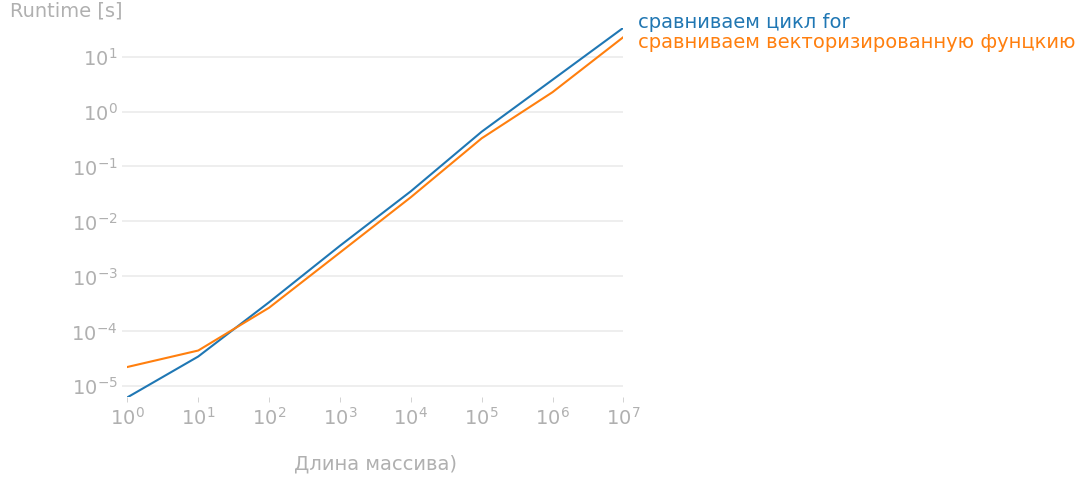

In [ ]:
perfplot.show(
    setup=np.random.rand,
    equality_check=None,
    kernels=[
        lambda x: [function_without_vectorizization(i, b) for i in np.random.rand(len(x))],
        lambda x: function_with_vectorizization(np.random.rand(len(x)), b)
        ],
    labels=['сравниваем цикл for', 'сравниваем векторизированную фунцкию'],
    n_range=[10**k for k in range(8)],
    xlabel='Длина массива)'
    )

In [ ]:
df = pd.DataFrame({'x': [1, 2, 3, 4]*10000, 'y': [5, 6, 7, 8]*10000})

print("сравниваем запуск на одном процессоре CPU: ")
%timeit df['x2'] = df['x'].apply(lambda x: x**2)
print("сравниваем запуск на нескольких процессорах CPU: ")
%timeit df['x2'] = df['x'].swifter.apply(lambda x: x**2)

сравниваем запуск на одном процессоре CPU: 
57.5 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
сравниваем запуск на нескольких процессорах CPU: 
15 ms ± 3.62 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Output()

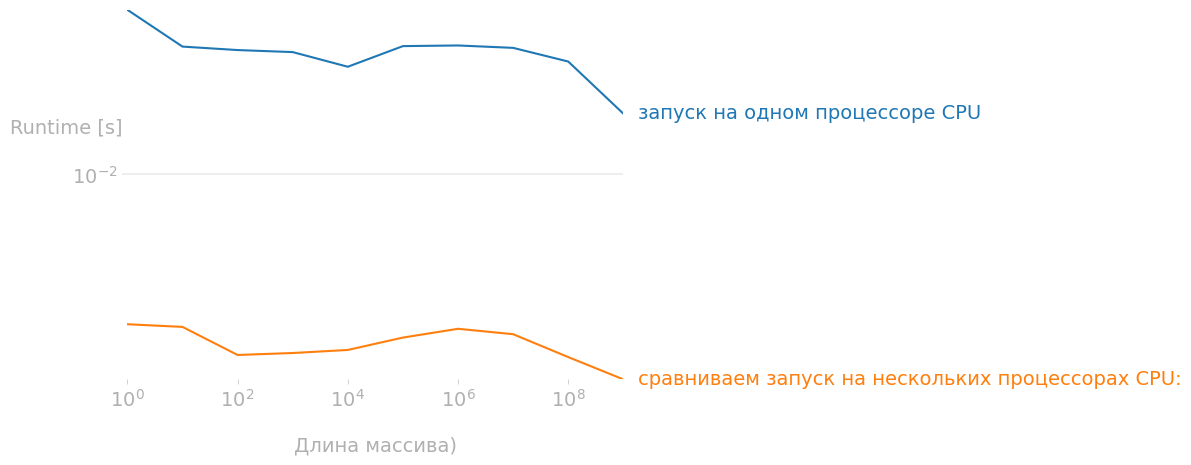

In [ ]:
perfplot.show(
    setup=np.random.rand,
    kernels=[
        lambda x: df['x'].apply(lambda x: x**2),
        lambda x: df['x'].swifter.apply(lambda x: x**2)
        ],
    labels=['запуск на одном процессоре CPU', 'сравниваем запуск на нескольких процессорах CPU:'],
    n_range=[10**k for k in range(10)],
    xlabel='Длина массива)'
    )

Output()

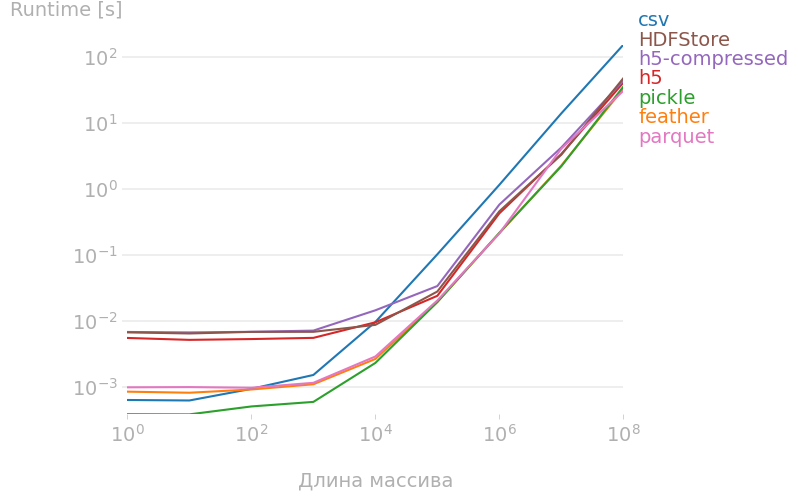

In [ ]:
def storage(x):
  store = pd.HDFStore(f"store{len(x)}.h5", 'w')
  store.put('data', pd.DataFrame({'A': [1]*len(x)}))
  store.get('data')
  store.close()

perfplot.show(
    setup=np.random.rand,
    equality_check=None,
    kernels=[
        lambda x: pd.DataFrame({'A': [1]*len(x)}).to_csv(f'df{len(x)}.csv'),
        lambda x: pd.DataFrame({'A': [1]*len(x)}).to_feather(f'df{len(x)}.feather'),
        lambda x: pd.DataFrame({'A': [1]*len(x)}).to_pickle(f'df{len(x)}.pickle'),
        lambda x: pd.DataFrame({'A': [1]*len(x)}).to_hdf(f'df{len(x)}.h5', 'df', complevel=None),
        lambda x: pd.DataFrame({'A': [1]*len(x)}).to_hdf(f'dfcomp{len(x)}.h5', 'df', complevel=9),
        lambda x: storage(x),
        lambda x: pd.DataFrame({'A': [1]*len(x)}).to_parquet(f'df{len(x)}.parquet')
        ],
    labels=['csv', 'feather','pickle','h5','h5-compressed','HDFStore','parquet'],
    n_range=[10**k for k in range(9)],
    xlabel='Длина массива'
    )

In [ ]:
!find . -maxdepth 1 -type f -exec du -h {} + | sort --human-numeric-sort --reverse | grep 100000000

1.5G	./store100000000.h5
1.5G	./df100000000.h5
1.1G	./df100000000.csv
763M	./df100000000.pickle
3.9M	./dfcomp100000000.h5
3.5M	./df100000000.feather
32K	./df100000000.parquet


Output()

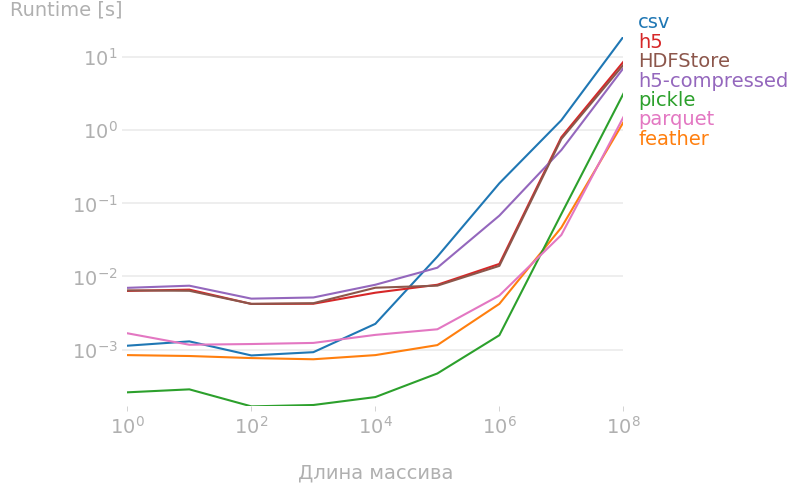

In [ ]:
def storage(x):
  store = pd.HDFStore(f"store{len(x)}.h5", 'r')
  store.get('data')
  store.close()

perfplot.show(
    setup=np.random.rand,
    equality_check=None,
    kernels=[
        lambda x: pd.read_csv(f'df{len(x)}.csv'),
        lambda x: pd.read_feather(f'df{len(x)}.feather', use_threads=True),
        lambda x: pd.read_pickle(f'df{len(x)}.pickle'),
        lambda x: pd.read_hdf(f'df{len(x)}.h5', 'df'),
        lambda x: pd.read_hdf(f'dfcomp{len(x)}.h5', 'df'),
        lambda x: storage(x),
        lambda x: pd.read_parquet(f'df{len(x)}.parquet')
        ],
    labels=['csv', 'feather','pickle','h5','h5-compressed','HDFStore','parquet'],
    n_range=[10**k for k in range(9)],
    xlabel='Длина массива'
    )

## GridSearch (поиск гиперпараметров по сетке)

[GridSearch](https://scikit-learn.sourceforge.net/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) (поиск гиперпараметров по сетке) в библиотеке sklearn.


In [ ]:
!pip install scikit-learn -q
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import timeit

housing = fetch_california_housing()
X = housing.data[:1000]
y = housing.target[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

model = GradientBoostingRegressor()
param_grid = {
    'learning_rate':    [0.1, 0,5, 0.01],
    'max_depth':        [3, 5],
    'min_samples_leaf': [1, 10]
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
)

In [ ]:
%%timeit -n1 -r1
grid_search.fit(X_train, y_train)

22.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Расширение Intel® Extension для Scikit-learn, чтобы работать на GPU

In [ ]:
!pip install scikit-learn-intelex -qq
import numpy as np
from sklearnex import patch_sklearn, config_context
patch_sklearn()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 24.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl 2024.2.2 requires tbb==2021.*, but you have tbb 2022.0.0 which is incompatible.


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
%%timeit -n1 -r1
with config_context(target_offload="gpu:0"):
    grid_search.fit(X_train, y_train)

13.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Хочу как в SQL !

In [ ]:
!pip install pandas pandasql -q
import pandas as pd
from pandasql import sqldf
df = pd.DataFrame({'Name': ['Алексей', 'Борис', 'Валентин'],
                   'Age': [25, 26, 27],
                   'City': ['Архангельск', 'Бологое', 'Воронеж']})
pysql = sqldf("SELECT * FROM df WHERE Age > 25")
print(pysql)

       Name  Age     City
0     Борис   26  Бологое
1  Валентин   27  Воронеж
